In [ ]:
Hand Written Digit Prediction - Classification Analysis

In [ ]:
Objective for Handwritten Digit Prediction - Classification Analysis:

The primary objective of this project is to develop a machine learning model capable of accurately recognizing and classifying handwritten digits (0-9) using the MNIST dataset. This involves:

1. Building a Classification Model:

Develop a robust classification algorithm that can distinguish between 10 different digit classes using image data.



2. Maximizing Accuracy:

Train and fine-tune the model to achieve high accuracy on both training and test datasets while minimizing errors and overfitting.



3. Comparative Analysis of Algorithms:

Evaluate different machine learning models (e.g., Logistic Regression, SVM, KNN, CNN) to identify which performs best on the given dataset.



4. Real-time Prediction Capabilities:

Build a model that can make real-time predictions on unseen handwritten digits.



5. Visualization and Interpretation:

Visualize model predictions and errors, analyze misclassified instances, and understand the model's decision boundaries.



6. Practical Application:

The model should serve as the basis for practical applications like automated data entry systems, check recognition, and other handwriting-based digit recognition tasks.






In [39]:
import pandas
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (15, 2)

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

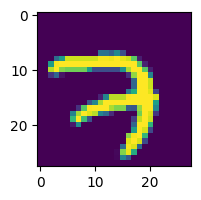

In [7]:
plt.imshow(X_train[5000])

In [32]:
def plot_image(x, y, index):
  fig = plt.imshow(x[index])
  plt.title(y[index])
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

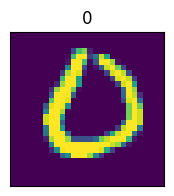

In [34]:
plot_image(X_train, y_train, 2500)

In [20]:
X_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 196,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168,
        253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 253, 254, 253,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        253, 251, 253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        198, 253, 254, 253, 114,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 251, 253, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         85, 253, 254, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28,  83, 196,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),  #input layer
    keras.layers.Dense(500, activation = 'relu'), #hidden layer 1
    keras.layers.Dense(300, activation = 'relu'), #hidden layer 2
    keras.layers.Dense(100, activation = 'relu'), #hidden layer 3
    keras.layers.Dense(10, activation = 'softmax') #output layers
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 9s 14ms/step - loss: 0.2222 - accuracy: 0.9334
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0840 - accuracy: 0.9742
Epoch 3/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0523 - accuracy: 0.9839
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0392 - accuracy: 0.9873
Epoch 5/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0325 - accuracy: 0.9894
Epoch 6/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0264 - accuracy: 0.9913
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0232 - accuracy: 0.9923
Epoch 8/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 9/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 10/10
600/600 [==============================] - 13s 21ms/step - loss: 0.0164 - accur

In [24]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
accuracy * 100

313/313 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9765


97.64999747276306

In [25]:
pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [26]:
y_test[400]

2

In [28]:
np.argmax(pred[400])

2

In [27]:
pred[400]

array([0.        , 0.        , 0.99999994, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [29]:
pred_values = [np.argmax(value) for value in pred]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
pred_values[:5]

[7, 2, 1, 0, 4]

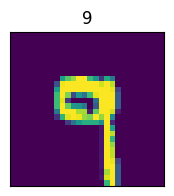

In [35]:
plot_image(X_test, pred_values, 6000)

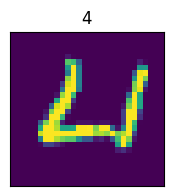

In [36]:
plot_image(X_test, pred_values, 33)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_values))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.96      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

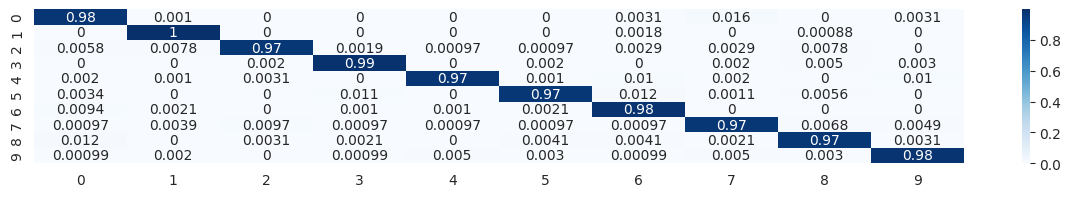

In [42]:
cf = confusion_matrix(y_test, pred_values, normalize = 'true')

sns.heatmap(cf, annot = True, cmap = 'Blues')

In [ ]:
explanation:

Handwritten digit prediction is a classical classification problem often associated with machine learning and computer vision. The most popular dataset used for this task is the MNIST (Modified National Institute of Standards and Technology) dataset, which contains 70,000 images of handwritten digits (0-9), with 60,000 used for training and 10,000 for testing. Each image is a 28x28 grayscale image.

Steps for Classification Analysis of Handwritten Digits:

1. Data Loading and Preprocessing:

Load the MNIST dataset: Most libraries like TensorFlow and PyTorch provide the MNIST dataset out-of-the-box.

Normalize the images: Scale the pixel values (0-255) to a range between 0 and 1.

Reshape the data: Since the images are 2D (28x28), we may need to reshape them to fit the model (e.g., flatten to a 1D vector for some models or keep 2D structure for CNNs).

Split into training and testing sets: 60,000 for training and 10,000 for testing is the standard.



2. Exploratory Data Analysis (EDA):

Visualize a few samples from the dataset to understand what the digits look like.

Analyze the distribution of classes (digits from 0 to 9) to ensure there’s no class imbalance.



3. Model Selection: You can use various models for classification analysis. The most common ones for this task are:

Logistic Regression / Softmax Classifier: Basic but often works well with normalized images.

K-Nearest Neighbors (KNN): Uses distance metrics to classify, works well for smaller datasets.

Support Vector Machine (SVM): Good for classification, can be applied with a linear or non-linear kernel.

Neural Networks (MLP): A simple feed-forward neural network can classify the digits.

Convolutional Neural Networks (CNN): CNNs are particularly effective at handling image data due to their ability to capture spatial hierarchies. Popular architectures include LeNet, VGG, and modern architectures like ResNet.



4. Training the Model:

Define the model architecture, loss function (e.g., categorical cross-entropy), and optimizer (e.g., Adam, SGD).

Train the model on the training dataset and evaluate on the test set after each epoch.

Consider using early stopping or cross-validation to prevent overfitting.



5. Evaluation:

Use metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the model.

Generate a confusion matrix to see how well the model is distinguishing between the different digits.

Optionally, perform visual error analysis to see which digits are commonly misclassified and why.



6. Hyperparameter Tuning:

Use grid search or random search to find the best hyperparameters (e.g., learning rate, batch size, number of layers, kernel size, etc.).

Regularization techniques like dropout and L2 regularization can improve performance and reduce overfitting.



7. Final Predictions:

Once the model is well-trained and tuned, make predictions on the test data.

You can visualize some of the predictions to confirm if the results make sense.



8. Model Deployment (Optional):

You can deploy the model in a web app using frameworks like Flask, Django, or FastAPI.

Models can be integrated into mobile apps using TensorFlow Lite, PyTorch Mobile, or other solutions